In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs

In [156]:
from lifetimes.utils import summary_data_from_transaction_data
from lifetimes.fitters.beta_geo_fitter import BetaGeoFitter

## Input Data and Preprocessing

In [179]:
df = pd.read_csv("dataset_pop_latest.csv")
df.head()

,opa_id,trx_date,source,product_cat,opa_id_1
0,677629775922ebd396a153af934a9557f65c74dd8fefe6200,2020-12-04 00:00:00 UTC,Dataprep,MOTOR VEHICLE,677629775922ebd396a153af934a9557f65c74dd8fefe6200
1,677629775922ebd396a153af934a9557f65c74dd8fefe6200,2020-06-27 00:00:00 UTC,Dataprep,MOTOR VEHICLE,677629775922ebd396a153af934a9557f65c74dd8fefe6200
2,677629775922ebd396a153af934a9557f65c74dd8fefe6200,2020-06-27 00:00:00 UTC,Dataprep,MOTOR VEHICLE,677629775922ebd396a153af934a9557f65c74dd8fefe6200
3,677629775922ebd396a153af934a9557f65c74dd8fefe6200,2020-01-21 00:00:00 UTC,Dataprep,MOTOR VEHICLE,677629775922ebd396a153af934a9557f65c74dd8fefe6200
4,677629775922ebd396a153af934a9557f65c74dd8fefe6200,2020-09-01 00:00:00 UTC,Dataprep,MOTOR VEHICLE,677629775922ebd396a153af934a9557f65c74dd8fefe6200


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142898 entries, 0 to 2142897
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   opa_id       object
 1   trx_date     object
 2   source       object
 3   product_cat  object
 4   opa_id_1     object
dtypes: object(5)
memory usage: 81.7+ MB


In [181]:
df['trx_date'] = pd.to_datetime(df.trx_date, utc=True)
df.head()

,opa_id,trx_date,source,product_cat,opa_id_1
0,677629775922ebd396a153af934a9557f65c74dd8fefe6200,2020-12-04 00:00:00+00:00,Dataprep,MOTOR VEHICLE,677629775922ebd396a153af934a9557f65c74dd8fefe6200
1,677629775922ebd396a153af934a9557f65c74dd8fefe6200,2020-06-27 00:00:00+00:00,Dataprep,MOTOR VEHICLE,677629775922ebd396a153af934a9557f65c74dd8fefe6200
2,677629775922ebd396a153af934a9557f65c74dd8fefe6200,2020-06-27 00:00:00+00:00,Dataprep,MOTOR VEHICLE,677629775922ebd396a153af934a9557f65c74dd8fefe6200
3,677629775922ebd396a153af934a9557f65c74dd8fefe6200,2020-01-21 00:00:00+00:00,Dataprep,MOTOR VEHICLE,677629775922ebd396a153af934a9557f65c74dd8fefe6200
4,677629775922ebd396a153af934a9557f65c74dd8fefe6200,2020-09-01 00:00:00+00:00,Dataprep,MOTOR VEHICLE,677629775922ebd396a153af934a9557f65c74dd8fefe6200


In [182]:
df['trx_date'] = df['trx_date'].dt.tz_convert('Asia/Jakarta')
df.head()

,opa_id,trx_date,source,product_cat,opa_id_1
0,677629775922ebd396a153af934a9557f65c74dd8fefe6200,2020-12-04 07:00:00+07:00,Dataprep,MOTOR VEHICLE,677629775922ebd396a153af934a9557f65c74dd8fefe6200
1,677629775922ebd396a153af934a9557f65c74dd8fefe6200,2020-06-27 07:00:00+07:00,Dataprep,MOTOR VEHICLE,677629775922ebd396a153af934a9557f65c74dd8fefe6200
2,677629775922ebd396a153af934a9557f65c74dd8fefe6200,2020-06-27 07:00:00+07:00,Dataprep,MOTOR VEHICLE,677629775922ebd396a153af934a9557f65c74dd8fefe6200
3,677629775922ebd396a153af934a9557f65c74dd8fefe6200,2020-01-21 07:00:00+07:00,Dataprep,MOTOR VEHICLE,677629775922ebd396a153af934a9557f65c74dd8fefe6200
4,677629775922ebd396a153af934a9557f65c74dd8fefe6200,2020-09-01 07:00:00+07:00,Dataprep,MOTOR VEHICLE,677629775922ebd396a153af934a9557f65c74dd8fefe6200


In [183]:
df['date'] = df.trx_date.dt.date
df.head()

,opa_id,trx_date,source,product_cat,opa_id_1,date
0,677629775922ebd396a153af934a9557f65c74dd8fefe6200,2020-12-04 07:00:00+07:00,Dataprep,MOTOR VEHICLE,677629775922ebd396a153af934a9557f65c74dd8fefe6200,2020-12-04
1,677629775922ebd396a153af934a9557f65c74dd8fefe6200,2020-06-27 07:00:00+07:00,Dataprep,MOTOR VEHICLE,677629775922ebd396a153af934a9557f65c74dd8fefe6200,2020-06-27
2,677629775922ebd396a153af934a9557f65c74dd8fefe6200,2020-06-27 07:00:00+07:00,Dataprep,MOTOR VEHICLE,677629775922ebd396a153af934a9557f65c74dd8fefe6200,2020-06-27
3,677629775922ebd396a153af934a9557f65c74dd8fefe6200,2020-01-21 07:00:00+07:00,Dataprep,MOTOR VEHICLE,677629775922ebd396a153af934a9557f65c74dd8fefe6200,2020-01-21
4,677629775922ebd396a153af934a9557f65c74dd8fefe6200,2020-09-01 07:00:00+07:00,Dataprep,MOTOR VEHICLE,677629775922ebd396a153af934a9557f65c74dd8fefe6200,2020-09-01


In [184]:
df.describe(datetime_is_numeric=True)

,opa_id,trx_date,source,product_cat,opa_id_1,date
count,2142898,2142898,2142898,2142898,2142898,2142898
unique,191316,NaN,4,30,191316,1062
top,67762ac0d2207066f10b26aa501be5457b8fdaa318f1d5703,NaN,IDE,DIGITAL,67762ac0d2207066f10b26aa501be5457b8fdaa318f1d5703,2020-11-15
freq,66393,NaN,2032017,1920828,66393,35987
mean,NaN,2021-10-05 09:58:34.961774336+07:00,NaN,NaN,NaN,NaN
min,NaN,2020-01-01 07:00:00+07:00,NaN,NaN,NaN,NaN
25%,NaN,2021-03-30 07:57:32.249999872+07:00,NaN,NaN,NaN,NaN
50%,NaN,2021-10-12 21:23:35.500000+07:00,NaN,NaN,NaN,NaN
75%,NaN,2022-04-07 11:36:49+07:00,NaN,NaN,NaN,NaN
max,NaN,2022-11-28 23:58:10+07:00,NaN,NaN,NaN,NaN


In [185]:
date_grouped = df.groupby(df.date).count()
date_grouped

,opa_id,trx_date,source,product_cat,opa_id_1
date,,,,,
2020-01-01,18,18,18,18,18
2020-01-02,10,10,10,10,10
2020-01-03,7,7,7,7,7
2020-01-04,3,3,3,3,3
2020-01-05,12,12,12,12,12
...,...,...,...,...,...
2022-11-24,846,846,846,846,846
2022-11-25,1527,1527,1527,1527,1527
2022-11-26,1057,1057,1057,1057,1057


In [186]:
df.trx_date.dt.year.value_counts()

2021    983960
2022    910506
2020    248432
Name: trx_date, dtype: int64

In [187]:
df.loc[df.trx_date.dt.year < 2020].source.unique()

array([], dtype=object)

In [188]:
df1 = df.loc[(df.trx_date.dt.year >= 2020)]
date_grouped = df1.groupby(df1.date).count()
date_grouped

,opa_id,trx_date,source,product_cat,opa_id_1
date,,,,,
2020-01-01,18,18,18,18,18
2020-01-02,10,10,10,10,10
2020-01-03,7,7,7,7,7
2020-01-04,3,3,3,3,3
2020-01-05,12,12,12,12,12
...,...,...,...,...,...
2022-11-24,846,846,846,846,846
2022-11-25,1527,1527,1527,1527,1527
2022-11-26,1057,1057,1057,1057,1057


In [189]:
xmaxall_date = df1["date"].max()

In [190]:
def report(opa_id):
    dfx = df1[df1["opa_id"] == opa_id]
    xmax_date = dfx["date"].max()
    xmin_date = dfx["date"].min()

    # recency:
    print("customer minimum date:", xmin_date)
    print("customer maximum date:", xmax_date)
    xrec = (xmax_date - xmin_date)
    print("recency days:", xrec.days)                                    # recency = time span between first and last purchase
#     print("recency weeks:", xrec.weeks) 
#     print("recency months:", xrec.months) 
    
    # age T:
    xmaxall_date = df1["date"].max()
    print("population maximum date:", xmaxall_date)
    xage = (xmaxall_date - xmin_date).days                    # age T
    print("T days:", xage)

    # frequency:
    xfreq = len(dfx.groupby("date"))-1
    print("frequency days:", xfreq)

In [191]:
df1['rev'] = 1000

In [192]:
df_rft = summary_data_from_transaction_data(
    transactions = df1, 
    customer_id_col = "opa_id", 
    datetime_col = "date", 
    monetary_value_col = "rev", 
    observation_period_end = xmaxall_date, 
    freq = "M")

df_rft.head()

,frequency,recency,T,monetary_value
opa_id,,,,
677620000ae9be72f33610d2716058b77a0a6046110058133,0.00,0.00,23.98,0.00
677620000faba49d9018d6cbf58ffe79439361f03327b3068,1.00,1.02,9.99,"2,000.00"
677620001340b9d1f6f3f967eb917138de51ee3e5a3566373,0.00,0.00,14.00,0.00
677620001585e80be4c5979b25a7635bb000d254c9e415393,4.00,20.96,25.99,"2,000.00"
677620001884106b1b3a6d35e04c079c296b9814887619256,0.00,0.00,17.02,0.00


In [193]:
df_rft

,frequency,recency,T,monetary_value
opa_id,,,,
677620000ae9be72f33610d2716058b77a0a6046110058133,0.00,0.00,23.98,0.00
677620000faba49d9018d6cbf58ffe79439361f03327b3068,1.00,1.02,9.99,"2,000.00"
677620001340b9d1f6f3f967eb917138de51ee3e5a3566373,0.00,0.00,14.00,0.00
677620001585e80be4c5979b25a7635bb000d254c9e415393,4.00,20.96,25.99,"2,000.00"
677620001884106b1b3a6d35e04c079c296b9814887619256,0.00,0.00,17.02,0.00
...,...,...,...,...
67762fffed2882607150c00c568b0c77d975669f2667e7635,0.00,0.00,6.05,0.00
67762fffede17e58239c9edc482a1c400607d3b1bf5d06786,11.00,18.96,25.00,"2,272.73"
67762ffff4d5d379a920b85c029888a12837aa3b298363240,0.00,0.00,14.00,0.00


In [87]:
df_rft.to_csv('chs_population.csv', index = False)

## Input Test Data and Preprocessing (Later)

In [57]:
df1 = pd.read_csv("bas_registered_all_users_list.csv")
df1.head()

,opa_id,trx_date,source
0,67762136f5a7585207c4e31ecfb4bcfc0d6b6b8b210839380,2020-10-01 00:00:00.000000 UTC,Dataprep
1,6776273c19806a520ccc62074d7bb14488512364db72b1217,2020-01-18 00:00:00.000000 UTC,Dataprep
2,677625ec7cd535572886235907bc982fa647e0ece61de3901,NaN,Dataprep
3,67762de027dc74143ee7dfe43feb3f366b020af20ed6f4362,NaN,Dataprep
4,6776237a655940470b282cb972412bce40673b974d4a40850,NaN,Dataprep


In [58]:
df1 = df1.dropna().reset_index(drop = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33945 entries, 0 to 33944
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   opa_id    33945 non-null  object
 1   trx_date  33945 non-null  object
 2   source    33945 non-null  object
dtypes: object(3)
memory usage: 795.7+ KB


In [59]:
df1['trx_date'] = pd.to_datetime(df1.trx_date, utc=True)
df1.head()

,opa_id,trx_date,source
0,67762136f5a7585207c4e31ecfb4bcfc0d6b6b8b210839380,2020-10-01 00:00:00+00:00,Dataprep
1,6776273c19806a520ccc62074d7bb14488512364db72b1217,2020-01-18 00:00:00+00:00,Dataprep
2,677623fd961452ac49e1e5551ce916c33eb62261d8ba75819,2017-03-17 00:00:00+00:00,Dataprep
3,677624e2a31381560c7f24c50653931b5fc0587c448268192,2020-07-04 00:00:00+00:00,Dataprep
4,677625bec96f676004b4a5dc5c6b14e03b722daa1079f7058,2019-04-30 00:00:00+00:00,Dataprep


In [60]:
df1['trx_date'] = df1['trx_date'].dt.tz_convert('Asia/Jakarta')
df1.head()

,opa_id,trx_date,source
0,67762136f5a7585207c4e31ecfb4bcfc0d6b6b8b210839380,2020-10-01 07:00:00+07:00,Dataprep
1,6776273c19806a520ccc62074d7bb14488512364db72b1217,2020-01-18 07:00:00+07:00,Dataprep
2,677623fd961452ac49e1e5551ce916c33eb62261d8ba75819,2017-03-17 07:00:00+07:00,Dataprep
3,677624e2a31381560c7f24c50653931b5fc0587c448268192,2020-07-04 07:00:00+07:00,Dataprep
4,677625bec96f676004b4a5dc5c6b14e03b722daa1079f7058,2019-04-30 07:00:00+07:00,Dataprep


In [61]:
df1['date'] = df1.trx_date.dt.date
df1.head()

,opa_id,trx_date,source,date
0,67762136f5a7585207c4e31ecfb4bcfc0d6b6b8b210839380,2020-10-01 07:00:00+07:00,Dataprep,2020-10-01
1,6776273c19806a520ccc62074d7bb14488512364db72b1217,2020-01-18 07:00:00+07:00,Dataprep,2020-01-18
2,677623fd961452ac49e1e5551ce916c33eb62261d8ba75819,2017-03-17 07:00:00+07:00,Dataprep,2017-03-17
3,677624e2a31381560c7f24c50653931b5fc0587c448268192,2020-07-04 07:00:00+07:00,Dataprep,2020-07-04
4,677625bec96f676004b4a5dc5c6b14e03b722daa1079f7058,2019-04-30 07:00:00+07:00,Dataprep,2019-04-30


In [62]:
df1.describe(datetime_is_numeric=True)

,opa_id,trx_date,source,date
count,33945,33945,33945,33945
unique,1586,NaN,5,1098
top,67762a357ba3bf2949866a55a1ed6198fbde039a597887037,NaN,Virgo,2022-01-24
freq,452,NaN,22447,304
mean,NaN,2021-12-17 07:14:42.610959104+07:00,NaN,NaN
min,NaN,2014-11-28 07:00:00+07:00,NaN,NaN
25%,NaN,2021-11-09 07:00:00+07:00,NaN,NaN
50%,NaN,2022-01-26 19:17:36+07:00,NaN,NaN
75%,NaN,2022-04-10 16:16:18+07:00,NaN,NaN
max,NaN,2022-10-17 23:23:19+07:00,NaN,NaN


In [63]:
date_grouped1 = df1.groupby(df.date).count()
date_grouped1

,opa_id,trx_date,source,date
date,,,,
2013-02-05,1,1,1,1
2013-03-07,1,1,1,1
2013-05-14,1,1,1,1
2013-10-31,1,1,1,1
2013-11-27,1,1,1,1
...,...,...,...,...
2022-10-06,3,3,3,3
2022-10-07,3,3,3,3
2022-10-08,1,1,1,1


In [64]:
df1.trx_date.dt.year.value_counts()

2022    20730
2021    11610
2020     1206
2019      276
2018       86
2017       22
2016        8
2015        6
2014        1
Name: trx_date, dtype: int64

In [65]:
df1.loc[df.trx_date.dt.year < 2020].source.unique()

array(['Dataprep', 'Virgo', 'IDE'], dtype=object)

In [66]:
df1 = df1.loc[(df1.trx_date.dt.year >= 2020) & (df1.trx_date <= '2022-10-13')]
date_grouped1 = df1.groupby(df1.date).count()
date_grouped1

,opa_id,trx_date,source
date,,,
2020-01-07,1,1,1
2020-01-09,1,1,1
2020-01-11,1,1,1
2020-01-13,1,1,1
2020-01-18,2,2,2
...,...,...,...
2022-10-08,17,17,17
2022-10-09,8,8,8
2022-10-10,24,24,24


In [67]:
xmaxall_date = df1["date"].max()
xmaxall_date

datetime.date(2022, 10, 12)

In [68]:
def report(opa_id):
    dfx = df1[df1["opa_id"] == opa_id]
    xmax_date = dfx["date"].max()
    xmin_date = dfx["date"].min()

    # recency:
    print("customer minimum date:", xmin_date)
    print("customer maximum date:", xmax_date)
    xrec = (xmax_date - xmin_date)
    print("recency days:", xrec.days)                                    # recency = time span between first and last purchase
#     print("recency weeks:", xrec.weeks) 
#     print("recency months:", xrec.months) 
    
    # age T:
    xmaxall_date = df1["date"].max()
    print("population maximum date:", xmaxall_date)
    xage = (xmaxall_date - xmin_date).days                    # age T
    print("T days:", xage)

    # frequency:
    xfreq = len(dfx.groupby("date"))-1
    print("frequency days:", xfreq)

In [69]:
df1['rev'] = 1000

In [70]:
df_rft1 = summary_data_from_transaction_data(
    transactions = df1, 
    customer_id_col = "opa_id", 
    datetime_col = "date", 
    monetary_value_col = "rev", 
    observation_period_end = xmaxall_date, 
    freq = "D")

df_rft1.head()

,frequency,recency,T,monetary_value
opa_id,,,,
6776200069d0ff9fd275fa44387098bf61c6af465c5991816,13.00,444.00,701.00,"1,384.62"
67762003975f0d1d1b0b79d7eeb4df0ea0c8365dcc43c7598,20.00,815.00,954.00,"1,950.00"
677620039ae224fbb5df2825e7f83a1891995856eec7b3244,36.00,570.00,618.00,"1,194.44"
67762003a9770cbf53a2116ee3e7e9e22c3e54e50f1a47604,1.00,33.00,352.00,"1,000.00"
67762003e8a56d1281c11f3c388733e4d0789c5aae5f22044,10.00,590.00,700.00,"1,300.00"


## Modelling

In [172]:
# BG/NBD model
bgf = BetaGeoFitter(penalizer_coef=1e-06)
bgf.fit(
        frequency = df_rft["frequency"], 
        recency = df_rft["recency"], 
        T = df_rft["T"],   
        weights = None,  
        verbose = True,
        tol = 1e-06)
pd.options.display.float_format = '{:,.3f}'.format
bgf.summary

Optimization terminated successfully.
         Current function value: -1.697630
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26


,coef,se(coef),lower 95% bound,upper 95% bound
r,0.507,0.003,0.502,0.512
alpha,3.004,0.020,2.964,3.043
a,3.457,0.115,3.231,3.682
b,23.269,0.845,21.614,24.924


## Prediction

In [123]:
# probability that a customer is alive for each customer in dataframe
prob_alive = bgf.conditional_probability_alive(
        frequency = df_rft1["frequency"], 
        recency = df_rft1["recency"], 
        T = df_rft1["T"])

df_rft1["prob_alive"] = prob_alive
pd.options.display.float_format = '{:,.2f}'.format
df_rft1.describe()

,frequency,recency,T,monetary_value,prob_alive
count,"1,584.00","1,584.00","1,584.00","1,584.00","1,584.00"
mean,4.26,9.60,18.15,"2,605.85",0.84
std,4.67,8.18,5.30,"3,549.21",0.14
min,0.00,0.00,3.02,0.00,0.16
25%,0.00,0.00,15.01,0.00,0.75
50%,3.00,9.99,19.94,"1,630.68",0.84
75%,7.00,16.95,21.98,"3,343.75",1.00
max,26.00,32.99,32.99,"40,363.64",1.00


In [173]:
# probability that a customer is alive for each customer in dataframe
prob_alive = bgf.conditional_probability_alive(
        frequency = df_rft["frequency"], 
        recency = df_rft["recency"], 
        T = df_rft["T"])

df_rft["prob_alive"] = prob_alive
pd.options.display.float_format = '{:,.2f}'.format
df_rft.describe()

,frequency,recency,T,monetary_value,prob_alive
count,"191,316.00","191,316.00","191,316.00","191,316.00","191,316.00"
mean,2.21,6.16,17.97,"1,491.67",0.74
std,3.28,7.43,5.87,"19,124.55",0.29
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,13.01,0.00,0.53
50%,1.00,2.00,19.02,"1,000.00",0.83
75%,3.00,11.07,23.00,"2,000.00",1.00
max,32.00,34.00,34.00,"4,423,533.33",1.00


In [125]:
df_rft1.head()

,frequency,recency,T,monetary_value,prob_alive
opa_id,,,,,
6776200069d0ff9fd275fa44387098bf61c6af465c5991816,6.00,14.00,22.97,"3,000.00",0.64
67762003975f0d1d1b0b79d7eeb4df0ea0c8365dcc43c7598,9.00,25.99,31.02,"4,333.33",0.80
677620039ae224fbb5df2825e7f83a1891995856eec7b3244,15.00,17.94,19.94,"2,866.67",0.87
67762003a9770cbf53a2116ee3e7e9e22c3e54e50f1a47604,1.00,1.02,11.99,"1,000.00",0.74
67762003e8a56d1281c11f3c388733e4d0789c5aae5f22044,5.00,18.96,22.97,"2,600.00",0.82


In [178]:
df_rft.loc[['6776200021bd05cd1792f883c7bd91c1a5cbf27b3a3710344', '67762000291a47502aa0426a20d5995772ef63263d03e0129',
       '677620002ecf9510e4b024813a1be069beaa97e5bd6165967', '67762000329307a2732804ea68caae687eaa56283e1041964']]

,frequency,recency,T,monetary_value,prob_alive
opa_id,,,,,
6776200021bd05cd1792f883c7bd91c1a5cbf27b3a3710344,4.00,9.04,20.04,"1,250.00",0.29
67762000291a47502aa0426a20d5995772ef63263d03e0129,3.00,8.97,21.98,"2,000.00",0.36
677620002ecf9510e4b024813a1be069beaa97e5bd6165967,7.00,17.97,23.00,"2,428.57",0.63
67762000329307a2732804ea68caae687eaa56283e1041964,11.00,18.04,18.04,"3,909.09",0.91


In [127]:
df_prob_alive = df_rft1.copy()
df_prob_alive['days'] = df_rft1.prob_alive
df_prob_alive.head()

,frequency,recency,T,monetary_value,prob_alive,days
opa_id,,,,,,
6776200069d0ff9fd275fa44387098bf61c6af465c5991816,6.00,14.00,22.97,"3,000.00",0.64,0.64
67762003975f0d1d1b0b79d7eeb4df0ea0c8365dcc43c7598,9.00,25.99,31.02,"4,333.33",0.80,0.80
677620039ae224fbb5df2825e7f83a1891995856eec7b3244,15.00,17.94,19.94,"2,866.67",0.87,0.87
67762003a9770cbf53a2116ee3e7e9e22c3e54e50f1a47604,1.00,1.02,11.99,"1,000.00",0.74,0.74
67762003e8a56d1281c11f3c388733e4d0789c5aae5f22044,5.00,18.96,22.97,"2,600.00",0.82,0.82


## Weekly (Skip)

In [41]:
df_rft = summary_data_from_transaction_data(
    transactions = df1, 
    customer_id_col = "opa_id", 
    datetime_col = "date", 
    monetary_value_col = "rev", 
    observation_period_end = xmaxall_date, 
    freq = "W")
bgf.fit(
        frequency = df_rft["frequency"], 
        recency = df_rft["recency"], 
        T = df_rft["T"],   
        weights = None,  
        verbose = True,
        tol = 1e-06)
prob_alive = bgf.conditional_probability_alive(
        frequency = df_rft["frequency"], 
        recency = df_rft["recency"], 
        T = df_rft["T"])

df_rft["prob_alive"] = prob_alive
df_prob_alive['weekly'] = df_rft.prob_alive
df_prob_alive.head()

Optimization terminated successfully.
         Current function value: -4.378625
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24


,frequency,recency,T,monetary_value,prob_alive,days,weekly
opa_id,,,,,,,
677620000a0519109a162cbc5d3e014b43b7210f60f3c7783,0.00,0.00,520.00,0.00,1.00,1.00,1.00
677620000c09b3ae535dcee54ba5fe119a7c56b5d47779591,3.00,177.00,561.00,"1,000.00",0.16,0.16,0.18
677620000e7f12a192d41409fe1163dad5df15b9e36175743,0.00,0.00,587.00,0.00,1.00,1.00,1.00
677620000f7ef774aa906883232b279bd52473d319aae1575,5.00,361.00,644.00,"1,200.00",0.31,0.31,0.44
677620000fa976221a0977801750cdec3cb99c799fd166602,1.00,346.00,751.00,"1,000.00",0.66,0.66,0.69


## Monthly

In [153]:
df_rft1 = summary_data_from_transaction_data(
    transactions = df1, 
    customer_id_col = "opa_id", 
    datetime_col = "date", 
    monetary_value_col = "rev", 
    observation_period_end = xmaxall_date, 
    freq = "M")
bgf.fit(
        frequency = df_rft1["frequency"], 
        recency = df_rft1["recency"], 
        T = df_rft1["T"],   
        weights = None,  
        verbose = True,
        tol = 1e-06)
prob_alive = bgf.conditional_probability_alive(
        frequency = df_rft1["frequency"], 
        recency = df_rft1["recency"], 
        T = df_rft1["T"])

df_rft["prob_alive"] = prob_alive
df_prob_alive['monthly'] = df_rft.prob_alive
df_prob_alive.head()

Optimization terminated successfully.
         Current function value: -1.697630
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26


,frequency,recency,T,monetary_value,prob_alive,days,monthly
opa_id,,,,,,,
6776200069d0ff9fd275fa44387098bf61c6af465c5991816,6.00,14.00,22.97,"3,000.00",0.64,0.64,NaN
67762003975f0d1d1b0b79d7eeb4df0ea0c8365dcc43c7598,9.00,25.99,31.02,"4,333.33",0.80,0.80,NaN
677620039ae224fbb5df2825e7f83a1891995856eec7b3244,15.00,17.94,19.94,"2,866.67",0.87,0.87,NaN
67762003a9770cbf53a2116ee3e7e9e22c3e54e50f1a47604,1.00,1.02,11.99,"1,000.00",0.74,0.74,NaN
67762003e8a56d1281c11f3c388733e4d0789c5aae5f22044,5.00,18.96,22.97,"2,600.00",0.82,0.82,NaN


In [154]:
df_prob_alive

,frequency,recency,T,monetary_value,prob_alive,days,monthly
opa_id,,,,,,,
6776200069d0ff9fd275fa44387098bf61c6af465c5991816,6.00,14.00,22.97,"3,000.00",0.64,0.64,NaN
67762003975f0d1d1b0b79d7eeb4df0ea0c8365dcc43c7598,9.00,25.99,31.02,"4,333.33",0.80,0.80,NaN
677620039ae224fbb5df2825e7f83a1891995856eec7b3244,15.00,17.94,19.94,"2,866.67",0.87,0.87,NaN
67762003a9770cbf53a2116ee3e7e9e22c3e54e50f1a47604,1.00,1.02,11.99,"1,000.00",0.74,0.74,NaN
67762003e8a56d1281c11f3c388733e4d0789c5aae5f22044,5.00,18.96,22.97,"2,600.00",0.82,0.82,NaN
...,...,...,...,...,...,...,...
67762feedde9d3458f01204e978e4a4ae06855293c8931942,6.00,14.03,21.98,"1,000.00",0.67,0.67,NaN
67762ff7eed44de857196f9390158ab1d7e83eaf701800952,4.00,15.01,17.02,"1,250.00",0.85,0.85,NaN
67762ffae0df2a6b1760b8a6709964c7ee32a265c80142086,2.00,5.98,21.98,"1,000.00",0.63,0.63,NaN


In [76]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.89,0.05,0.80,0.98
alpha,3.58,0.22,3.15,4.01
a,0.89,0.34,0.22,1.56
b,26.33,10.51,5.73,46.92


## Comparison

In [43]:
def distribution():
    fig, ax = plt.subplots(figsize=(18,6))

    range_days = np.linspace(0, 1, 1000)
    range_weekly = np.linspace(0, 1, 1000)
    range_monthly = np.linspace(0, 1, 1000)
    days = df_prob_alive.loc[:, 'days']
    weekly = df_prob_alive.loc[:, 'weekly']
    monthly = df_prob_alive.loc[:, 'monthly']
    
    days_stat = days.describe().T
    days_mean = days_stat['mean']
    days_std = days_stat['std']
    
    weekly_stat = weekly.describe().T
    weekly_mean = weekly_stat['mean']
    weekly_std = weekly_stat['std']
    
    monthly_stat = monthly.describe().T
    monthly_mean = monthly_stat['mean']
    monthly_std = monthly_stat['std']
    
    ydays = scs.norm(days_mean, days_std).pdf(range_days)
    yweekly = scs.norm(weekly_mean, weekly_std).pdf(range_weekly)
    ymonthly = scs.norm(monthly_mean, monthly_std).pdf(range_monthly)

    ax.plot(range_days, ydays, color='blue',label='days')
    ax.axvline(x=days_mean, c='blue', alpha=0.5, linestyle='--')
    ax.plot(range_weekly, yweekly, color='green',label='weekly')
    ax.axvline(x=weekly_mean, c='green', alpha=0.5, linestyle='--')
    ax.plot(range_monthly, ymonthly, color='gray',label='monthly')
    ax.axvline(x=monthly_mean, c='gray', alpha=0.5, linestyle='--')
    ax.set_ylim([0, max(max(ydays), max(yweekly), max(ymonthly))+0.05])
    ax.legend()
    ax.title.set_text(f"Distribution comparison")
    ax.title.set_size(20);

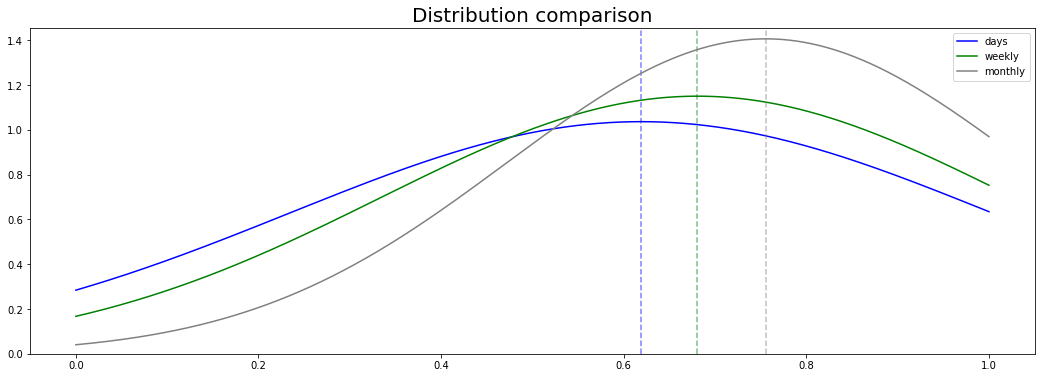

In [44]:
distribution()

In [45]:
df_prob_alive.loc[(df_prob_alive.days < 0.2) & (df_prob_alive.monthly > 0.9)].sort_values("days").head(20)

,frequency,recency,T,monetary_value,prob_alive,days,weekly,monthly
opa_id,,,,,,,,
67762a0c9b8607b5bec645f0459aa82c50c581ab476b60781,17.00,18.00,313.00,"3,941.18",0.00,0.00,0.02,1.00
6776236d2a040ed4712f4aa82654bd1d18c0055834c266588,11.00,11.00,311.00,"1,545.45",0.00,0.00,0.27,1.00
67762886ba9339dfae5f4caeda6bfb2086081ed46e55c0437,8.00,9.00,469.00,"1,375.00",0.00,0.00,0.18,1.00
677627d502738a27f720ad3c03d822e4345e3722a69ad2420,10.00,16.00,333.00,"3,300.00",0.00,0.00,0.01,1.00
6776241ad1d25b9b8b4308cb02c99e4d185b288a647c60899,9.00,12.00,279.00,"1,111.11",0.00,0.00,0.08,1.00
67762aab31e9063ef85bee5d45317c18686e1f322c6261549,7.00,16.00,617.00,"1,571.43",0.00,0.00,0.02,1.00
67762f218a51b45671bed334347bd4f1539657f6cfa0a3618,7.00,8.00,448.00,"6,285.71",0.00,0.00,0.19,1.00
67762b348b8e442e943d449f193e403eeec8473ba31ce6043,9.00,14.00,281.00,"1,333.33",0.00,0.00,0.08,1.00
67762ddef923a20da2584c2be0984869a5acd04e785014898,9.00,16.00,280.00,"1,111.11",0.00,0.00,0.08,1.00


In [78]:
report('6776200010f498f50860818545545d64d8b239d61113d6851')

customer minimum date: 2022-01-29
customer maximum date: 2022-02-20
recency days: 22
population maximum date: 2022-10-06
T days: 250
frequency days: 6


## Daily

In [181]:
opa_to_search = [
    "67762050c939c3bff733a903db6ede00f483eef4892df0373",
"67762084c82f8d908ebb5b8ad29438e47859d9eb286f10703",
"6776211e3f7ae846460f6f684565c38f02a89c088c0143919",
"6776228e060d8ee5fdd5fcd7e3574b786d8b45f9b31219913",
"677622c18d005a388f1a0df92e22dffd721acbca933982626",
"677623234d6285a529d855bc5c7a5d7d5976187b6293c5804",
"67762551faf5beae7274789d38a67f62d4034627980656987",
"677626842be9d30a562e55a65fe8ad7605c99516c701b2049",
"6776274c1890b9e6b1c3d08da127f2fef53454677989e6023",
"6776275e8d9917be95038760ad208ef06c8d8da82948c4365",
"677628354a4fdaca35c5cecb3675eda35700fb3abe9cd1555",
"67762899323bfff895ec2f7c1c8f6af22a7bc89eb22512161",
"677628f800602a4a95dc59cb4764c012544b1866e32a28562",
"67762985ec1e5fd8b4f8030b1d909878f143b117738fb9330",
"67762ab46c7924ccffdda3afac41b83d6d49bdde7b7f54733",
"67762be6030b6fb8b856c964bbb8bcf590c0fa859f99a6275",
"67762c2bfb4f7e8a42822e2ade7532f470d2c4106c7366313",
"67762c2d041fefc3b33a853707656d03a4776ea6b6c325296",
"67762cb36469683031b31117d159ec3f60d6624955ba72387",
"67762cbee188a22963718b5fa8a9fd5a1f49997dd2f861440",
"67762cbefb5996fa3bb6b38a0187859cd22f8bfa795b81741",
"67762cd747c8ab8fb2dc599446d9ce7701dea28f3cd657041",
"67762d00231adb511f874cb6101a9490f30f7783903c89161",
"67762e08fc1456c4bfc6afb84d115d42f1088bf1f59fd5262"
]

In [177]:
df_rft = summary_data_from_transaction_data(
    transactions = df1, 
    customer_id_col = "opa_id", 
    datetime_col = "date", 
    monetary_value_col = "rev", 
    observation_period_end = xmaxall_date, 
    freq = "D")
bgf.fit(
        frequency = df_rft["frequency"], 
        recency = df_rft["recency"], 
        T = df_rft["T"],   
        weights = None,  
        verbose = True,
        tol = 1e-06)
prob_alive = bgf.conditional_probability_alive(
        frequency = df_rft["frequency"], 
        recency = df_rft["recency"], 
        T = df_rft["T"])
prob_alive = bgf.conditional_probability_alive(
        frequency = df_rft["frequency"], 
        recency = df_rft["recency"], 
        T = df_rft["T"])
df_rft["prob_alive"] = prob_alive
df_rft.head()

Optimization terminated successfully.
         Current function value: -5.812964
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23


,frequency,recency,T,monetary_value,prob_alive
opa_id,,,,,
6776200005f4afb7767cf5c72ad7b0f39c41ff013e1c57584,0.00,0.00,448.00,0.00,1.00
677620000e22a922934a78ceeea1a1399002d103aaacb8689,0.00,0.00,523.00,0.00,1.00
6776200010f498f50860818545545d64d8b239d61113d6851,6.00,22.00,250.00,"1,333.33",0.00
6776200024002c1fd7671d2a7af35a41c25f1a26ecebf7340,0.00,0.00,263.00,0.00,1.00
67762000358dce28fe83c5c0be0f0ae33eaff972ee03d5022,4.00,299.00,563.00,"1,000.00",0.37


In [182]:
df_rft.loc[df_rft.index.isin(opa_to_search)]

,frequency,recency,T,monetary_value,prob_alive
opa_id,,,,,
67762050c939c3bff733a903db6ede00f483eef4892df0373,59.00,662.00,670.00,"2,576.27",0.97
67762084c82f8d908ebb5b8ad29438e47859d9eb286f10703,1.00,11.00,55.00,"1,000.00",0.57
6776211e3f7ae846460f6f684565c38f02a89c088c0143919,26.00,618.00,626.00,"1,076.92",0.96
6776228e060d8ee5fdd5fcd7e3574b786d8b45f9b31219913,12.00,524.00,565.00,"1,083.33",0.87
677622c18d005a388f1a0df92e22dffd721acbca933982626,0.00,0.00,22.00,0.00,1.00
677623234d6285a529d855bc5c7a5d7d5976187b6293c5804,18.00,405.00,424.00,"1,888.89",0.91
67762551faf5beae7274789d38a67f62d4034627980656987,1.00,498.00,537.00,"1,000.00",0.80
677626842be9d30a562e55a65fe8ad7605c99516c701b2049,0.00,0.00,32.00,0.00,1.00
6776274c1890b9e6b1c3d08da127f2fef53454677989e6023,34.00,299.00,304.00,"1,058.82",0.96


In [183]:
report('67762084c82f8d908ebb5b8ad29438e47859d9eb286f10703')

customer minimum date: 2022-08-12
customer maximum date: 2022-08-23
population maximum date: 2022-10-06
recency days: 44
T days: 55
frequency days: 1


In [152]:
df_prob_alive_2 = df_prob_alive_1.loc[df_prob_alive_1.frequency > 0]

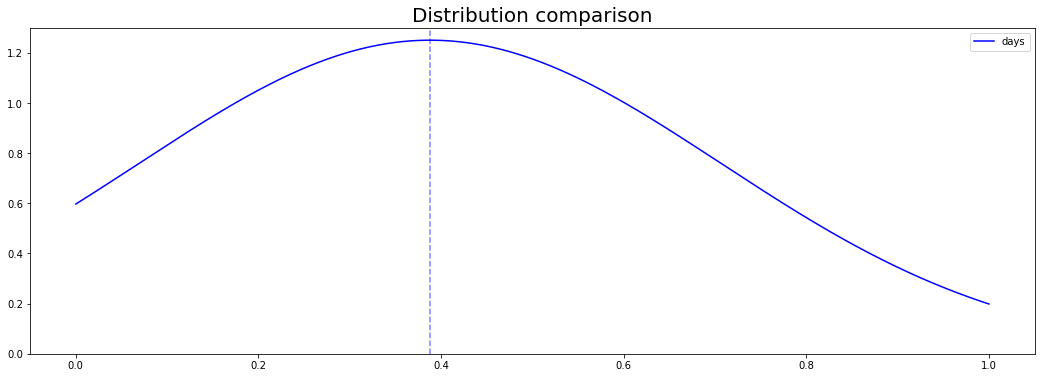

In [154]:

fig, ax = plt.subplots(figsize=(18,6))

range_days = np.linspace(0, 1, 1000)
days = df_prob_alive_2.loc[:, 'days']

days_stat = days.describe().T
days_mean = days_stat['mean']
days_std = days_stat['std']


ydays = scs.norm(days_mean, days_std).pdf(range_days)

ax.plot(range_days, ydays, color='blue',label='days')
ax.axvline(x=days_mean, c='blue', alpha=0.5, linestyle='--')
ax.set_ylim([0, max(max(ydays),1)+0.05])
ax.legend()
ax.title.set_text(f"Distribution comparison")
ax.title.set_size(20);

## Weekly

In [171]:
df_rft = summary_data_from_transaction_data(
    transactions = df1, 
    customer_id_col = "opa_id", 
    datetime_col = "date", 
    monetary_value_col = "rev", 
    observation_period_end = xmaxall_date, 
    freq = "W")
bgf.fit(
        frequency = df_rft["frequency"], 
        recency = df_rft["recency"], 
        T = df_rft["T"],   
        weights = None,  
        verbose = True,
        tol = 1e-06)
prob_alive = bgf.conditional_probability_alive(
        frequency = df_rft["frequency"], 
        recency = df_rft["recency"], 
        T = df_rft["T"])
prob_alive = bgf.conditional_probability_alive(
        frequency = df_rft["frequency"], 
        recency = df_rft["recency"], 
        T = df_rft["T"])
df_rft["prob_alive"] = prob_alive
df_rft.head()

Optimization terminated successfully.
         Current function value: -4.103294
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24


,frequency,recency,T,monetary_value,prob_alive
opa_id,,,,,
6776200005f4afb7767cf5c72ad7b0f39c41ff013e1c57584,0.00,0.00,64.00,0.00,1.00
677620000e22a922934a78ceeea1a1399002d103aaacb8689,0.00,0.00,75.00,0.00,1.00
6776200010f498f50860818545545d64d8b239d61113d6851,3.00,3.00,36.00,"2,333.33",0.02
6776200024002c1fd7671d2a7af35a41c25f1a26ecebf7340,0.00,0.00,38.00,0.00,1.00
67762000358dce28fe83c5c0be0f0ae33eaff972ee03d5022,4.00,42.00,80.00,"1,000.00",0.36


In [172]:
df_prob_alive_2 = df_rft.loc[df_rft.frequency > 0]

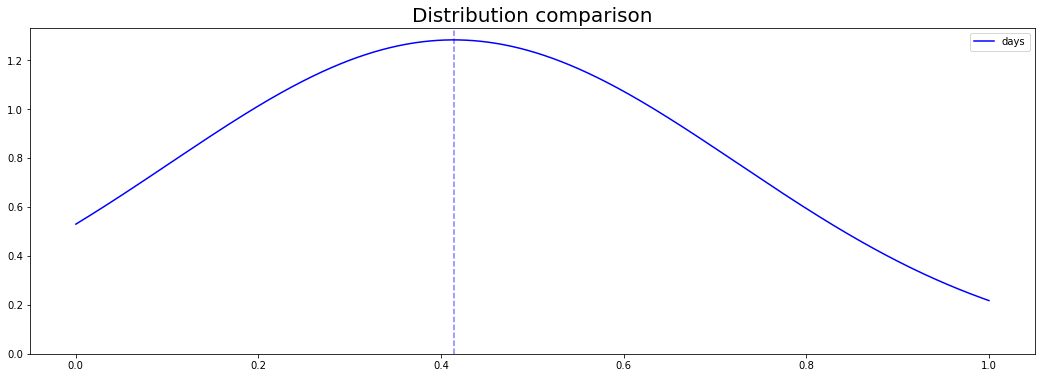

In [173]:

fig, ax = plt.subplots(figsize=(18,6))

range_days = np.linspace(0, 1, 1000)
days = df_prob_alive_2.loc[:, 'prob_alive']

days_stat = days.describe().T
days_mean = days_stat['mean']
days_std = days_stat['std']


ydays = scs.norm(days_mean, days_std).pdf(range_days)

ax.plot(range_days, ydays, color='blue',label='days')
ax.axvline(x=days_mean, c='blue', alpha=0.5, linestyle='--')
ax.set_ylim([0, max(max(ydays),1)+0.05])
ax.legend()
ax.title.set_text(f"Distribution comparison")
ax.title.set_size(20);

## Monthly (Use)

In [77]:
df_rft_month1 = summary_data_from_transaction_data(
    transactions = df1, 
    customer_id_col = "opa_id", 
    datetime_col = "date", 
    monetary_value_col = "rev", 
    observation_period_end = xmaxall_date, 
    freq = "M")
bgf.fit(
        frequency = df_rft_month1["frequency"], 
        recency = df_rft_month1["recency"], 
        T = df_rft_month1["T"],   
        weights = None,  
        verbose = True,
        tol = 1e-06)
prob_alive = bgf.conditional_probability_alive(
        frequency = df_rft_month1["frequency"], 
        recency = df_rft_month1["recency"], 
        T = df_rft_month1["T"])
prob_alive = bgf.conditional_probability_alive(
        frequency = df_rft_month1["frequency"], 
        recency = df_rft_month1["recency"], 
        T = df_rft_month1["T"])
df_rft_month1["prob_alive"] = prob_alive
df_rft_month1.head()

Optimization terminated successfully.
         Current function value: -5.347929
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30


,frequency,recency,T,monetary_value,prob_alive
opa_id,,,,,
6776200069d0ff9fd275fa44387098bf61c6af465c5991816,6.00,14.00,22.97,"3,000.00",0.67
67762003975f0d1d1b0b79d7eeb4df0ea0c8365dcc43c7598,9.00,25.99,31.02,"4,333.33",0.89
677620039ae224fbb5df2825e7f83a1891995856eec7b3244,15.00,17.94,19.94,"2,866.67",0.92
67762003a9770cbf53a2116ee3e7e9e22c3e54e50f1a47604,1.00,1.02,11.99,"1,000.00",0.75
67762003e8a56d1281c11f3c388733e4d0789c5aae5f22044,5.00,18.96,22.97,"2,600.00",0.93


In [78]:
df_prob_alive_2 = df_rft.loc[df_rft.frequency > 0]

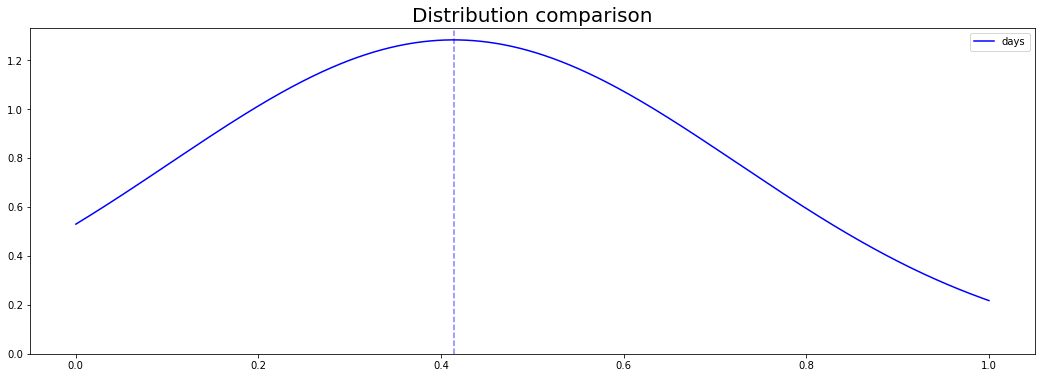

In [175]:

fig, ax = plt.subplots(figsize=(18,6))

range_days = np.linspace(0, 1, 1000)
days = df_prob_alive_2.loc[:, 'prob_alive']

days_stat = days.describe().T
days_mean = days_stat['mean']
days_std = days_stat['std']


ydays = scs.norm(days_mean, days_std).pdf(range_days)

ax.plot(range_days, ydays, color='blue',label='days')
ax.axvline(x=days_mean, c='blue', alpha=0.5, linestyle='--')
ax.set_ylim([0, max(max(ydays),1)+0.05])
ax.legend()
ax.title.set_text(f"Distribution comparison")
ax.title.set_size(20);

In [187]:
df_rft_month.columns = [f"{x}_month" for x in df_rft_month.columns]
df_rft_comp = pd.concat([df_rft, df_rft_month], axis=1)
df_rft_comp.loc[df_rft_comp.index.isin(opa_to_search)]

,frequency,recency,T,monetary_value,prob_alive,frequency_month,recency_month,T_month,monetary_value_month,prob_alive_month
opa_id,,,,,,,,,,
67762050c939c3bff733a903db6ede00f483eef4892df0373,59.00,662.00,670.00,"2,576.27",0.97,17.00,20.99,21.98,"8,941.18",0.88
67762084c82f8d908ebb5b8ad29438e47859d9eb286f10703,1.00,11.00,55.00,"1,000.00",0.57,0.00,0.00,2.00,0.00,1.00
6776211e3f7ae846460f6f684565c38f02a89c088c0143919,26.00,618.00,626.00,"1,076.92",0.96,12.00,19.98,20.96,"2,333.33",0.88
6776228e060d8ee5fdd5fcd7e3574b786d8b45f9b31219913,12.00,524.00,565.00,"1,083.33",0.87,8.00,17.02,19.02,"1,625.00",0.80
677622c18d005a388f1a0df92e22dffd721acbca933982626,0.00,0.00,22.00,0.00,1.00,0.00,0.00,0.99,0.00,1.00
677623234d6285a529d855bc5c7a5d7d5976187b6293c5804,18.00,405.00,424.00,"1,888.89",0.91,6.00,13.01,14.00,"5,666.67",0.84
67762551faf5beae7274789d38a67f62d4034627980656987,1.00,498.00,537.00,"1,000.00",0.80,1.00,16.00,18.00,"1,000.00",0.80
677626842be9d30a562e55a65fe8ad7605c99516c701b2049,0.00,0.00,32.00,0.00,1.00,0.00,0.00,0.99,0.00,1.00
6776274c1890b9e6b1c3d08da127f2fef53454677989e6023,34.00,299.00,304.00,"1,058.82",0.96,7.00,9.99,9.99,"4,571.43",0.90


In [192]:
import math

In [198]:
math.ceil(0.0001)

1

In [23]:
df_prob_alive

,frequency,recency,T,monetary_value,prob_alive,days,monthly
opa_id,,,,,,,
677620000a0519109a162cbc5d3e014b43b7210f60f3c7783,0.00,0.00,520.00,0.00,1.00,1.00,1.00
677620000c09b3ae535dcee54ba5fe119a7c56b5d47779591,3.00,177.00,561.00,"1,000.00",0.16,0.16,0.25
677620000e7f12a192d41409fe1163dad5df15b9e36175743,0.00,0.00,587.00,0.00,1.00,1.00,1.00
677620000f7ef774aa906883232b279bd52473d319aae1575,5.00,361.00,644.00,"1,200.00",0.31,0.31,0.49
677620000fa976221a0977801750cdec3cb99c799fd166602,1.00,346.00,751.00,"1,000.00",0.66,0.66,0.73
...,...,...,...,...,...,...,...
67762fffe99a8133b2b2ba7d5bf49ea7eaaba161a47cf3357,1.00,185.00,355.00,"2,000.00",0.70,0.70,0.76
67762fffe99b167c0cb4c2a86e295043716dd0e1730358161,9.00,188.00,750.00,"1,000.00",0.00,0.00,0.02
67762fffedcec7a12b09cf45f8b9b452576b64357eaba5324,2.00,92.00,575.00,"1,000.00",0.11,0.11,0.22


In [79]:
df_prob_alive['frequency_month'] =  df_rft_month1.frequency

In [80]:
df_prob_alive['age_month'] = df_rft_month1['T']

In [81]:
df_prob_alive['recency_month'] = df_rft_month1.recency
df_prob_alive['common_recency_month'] = df_prob_alive['age_month'] - df_prob_alive['recency_month']
df_prob_alive['common_recency'] = df_prob_alive['T'] - df_prob_alive['recency']

In [82]:
def adj_prob_alive(x):
    prob_alive_month = x['monthly']
    frequency_month = x['frequency_month']
    prob_alive = x['days']
    frequency = x['frequency']
    T = x['T']
    if frequency_month != 0:
        return prob_alive_month
    elif frequency != 0:
        return prob_alive
    else:
        val = T/30
        if val < 1:
            val = 1
        return round(1/(val), 2)

In [83]:
df_prob_alive["prob_adj"] = df_prob_alive.apply(adj_prob_alive, axis=1)
df_prob_alive

,frequency,recency,T,monetary_value,prob_alive,days,monthly,frequency_month,age_month,recency_month,common_recency_month,common_recency,prob_adj
opa_id,,,,,,,,,,,,,
6776200069d0ff9fd275fa44387098bf61c6af465c5991816,13.00,444.00,701.00,"1,384.62",0.04,0.04,0.67,6.00,22.97,14.00,8.97,257.00,0.67
67762003975f0d1d1b0b79d7eeb4df0ea0c8365dcc43c7598,20.00,815.00,954.00,"1,950.00",0.48,0.48,0.89,9.00,31.02,25.99,5.03,139.00,0.89
677620039ae224fbb5df2825e7f83a1891995856eec7b3244,36.00,570.00,618.00,"1,194.44",0.67,0.67,0.92,15.00,19.94,17.94,2.00,48.00,0.92
67762003a9770cbf53a2116ee3e7e9e22c3e54e50f1a47604,1.00,33.00,352.00,"1,000.00",0.27,0.27,0.75,1.00,11.99,1.02,10.97,319.00,0.75
67762003e8a56d1281c11f3c388733e4d0789c5aae5f22044,10.00,590.00,700.00,"1,300.00",0.70,0.70,0.93,5.00,22.97,18.96,4.01,110.00,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67762feedde9d3458f01204e978e4a4ae06855293c8931942,6.00,403.00,655.00,"1,000.00",0.33,0.33,0.73,6.00,21.98,14.03,7.95,252.00,0.73
67762ff7eed44de857196f9390158ab1d7e83eaf701800952,5.00,475.00,521.00,"1,000.00",0.84,0.84,0.95,4.00,17.02,15.01,2.00,46.00,0.95
67762ffae0df2a6b1760b8a6709964c7ee32a265c80142086,2.00,187.00,676.00,"1,000.00",0.27,0.27,0.64,2.00,21.98,5.98,16.00,489.00,0.64


In [84]:
df_prob_alive.prob_adj.describe()

count   1,584.00
mean        0.62
std         0.37
min         0.00
25%         0.13
50%         0.83
75%         0.93
max         0.98
Name: prob_adj, dtype: float64

In [29]:
df_rft_comp.loc[df_rft_comp.index.isin(opa_to_search), ["prob_alive", "prob_alive_month", "prob_adj"]]

NameError: name 'df_rft_comp' is not defined

In [204]:
report('67762e08fc1456c4bfc6afb84d115d42f1088bf1f59fd5262')

customer minimum date: 2021-02-06
customer maximum date: 2022-09-11
population maximum date: 2022-10-06
recency days: 25
T days: 607
frequency days: 21


In [205]:
df_rft_comp['is_search'] = df_rft_comp.index.isin(opa_to_search)

In [207]:
import seaborn as sns

<AxesSubplot:xlabel='is_search', ylabel='prob_adj'>

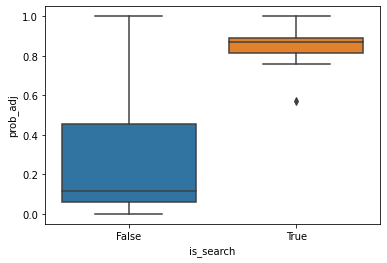

In [208]:
sns.boxplot(x = df_rft_comp.is_search, y = df_rft_comp.prob_adj)

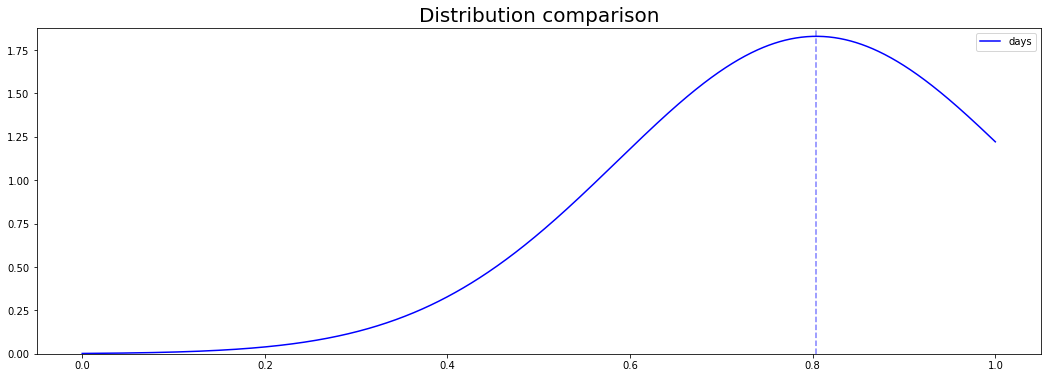

In [50]:
fig, ax = plt.subplots(figsize=(18,6))


range_days = np.linspace(0, 1, 1000)
days = df_prob_alive.loc[df_prob_alive.frequency > 0, 'prob_adj']

days_stat = days.describe().T
days_mean = days_stat['mean']
days_std = days_stat['std']


ydays = scs.norm(days_mean, days_std).pdf(range_days)

ax.plot(range_days, ydays, color='blue',label='days')
ax.axvline(x=days_mean, c='blue', alpha=0.5, linestyle='--')
ax.set_ylim([0, max(max(ydays),1)+0.05])
ax.legend()
ax.title.set_text(f"Distribution comparison")
ax.title.set_size(20);

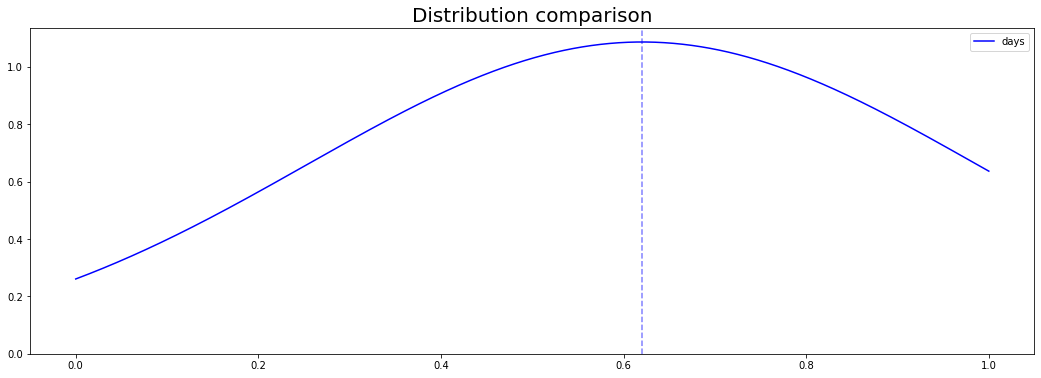

In [48]:
fig, ax = plt.subplots(figsize=(18,6))


range_days = np.linspace(0, 1, 1000)
days = df_prob_alive.prob_adj

days_stat = days.describe().T
days_mean = days_stat['mean']
days_std = days_stat['std']


ydays = scs.norm(days_mean, days_std).pdf(range_days)

ax.plot(range_days, ydays, color='blue',label='days')
ax.axvline(x=days_mean, c='blue', alpha=0.5, linestyle='--')
ax.set_ylim([0, max(max(ydays),1)+0.05])
ax.legend()
ax.title.set_text(f"Distribution comparison")
ax.title.set_size(20);

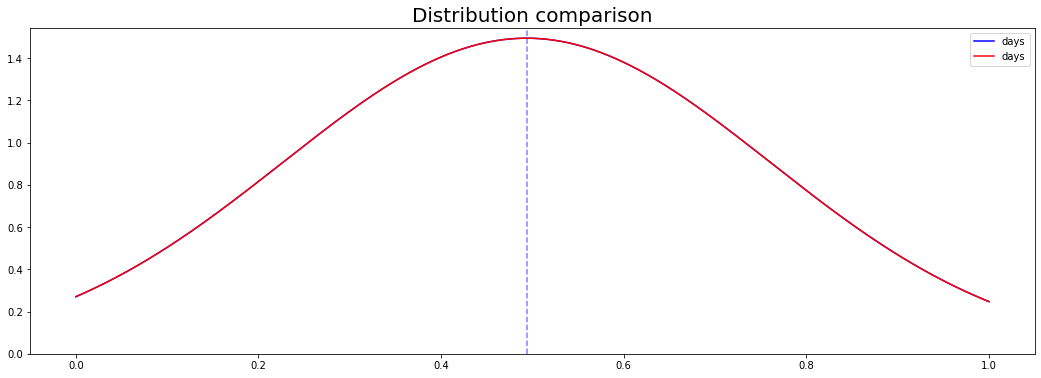

In [66]:
fig, ax = plt.subplots(figsize=(18,6))


range_days = np.linspace(0, 1, 1000)
days = df_prob_alive.loc[df_prob_alive.frequency == 1, 'prob_adj']

days_stat = days.describe().T
days_mean = days_stat['mean']
days_std = days_stat['std']

days1 = df_prob_alive.loc[df_prob_alive.frequency == 3, 'prob_adj']

days_stat1 = days.describe().T
days_mean1 = days_stat['mean']
days_std1 = days_stat['std']

ydays = scs.norm(days_mean, days_std).pdf(range_days)
ydays1 = scs.norm(days_mean1, days_std1).pdf(range_days)

ax.plot(range_days, ydays, color='blue',label='days')
ax.plot(range_days, ydays1, color='red',label='days')
ax.axvline(x=days_mean, c='blue', alpha=0.5, linestyle='--')
ax.set_ylim([0, max(max(ydays),1)+0.05])
ax.legend()
ax.title.set_text(f"Distribution comparison")
ax.title.set_size(20);

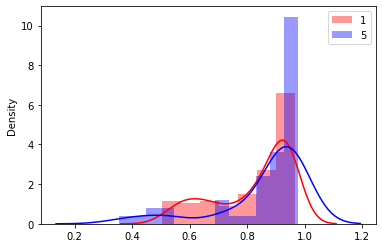

In [45]:
import seaborn as sns
sns.distplot(x = df_prob_alive.loc[df_prob_alive.frequency_month == 1, 'prob_adj'], kde = True, color = 'Red', label = '1')
sns.distplot(x = df_prob_alive.loc[df_prob_alive.frequency_month == 10, 'prob_adj'], kde = True, color = 'Blue', label = '5')
plt.legend()

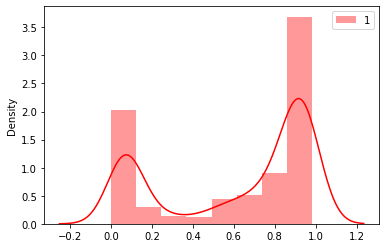

In [46]:
sns.distplot(x = df_prob_alive.prob_adj, kde = True, color = 'Red', label = '1')
plt.legend()

In [31]:
df_prob_alive.loc[(df_prob_alive.frequency_month == 6) & ((df_prob_alive.common_recency >30) | (df_prob_alive.common_recency <=60)), 'prob_adj'].describe()

count   5,679.00
mean        0.53
std         0.29
min         0.01
25%         0.23
50%         0.61
75%         0.79
max         0.89
Name: prob_adj, dtype: float64

In [32]:
df_prob_alive.loc[(df_prob_alive.frequency_month == 3) & (df_prob_alive.common_recency <=30), 'prob_adj'].describe()

count   669.00
mean      0.87
std       0.01
min       0.83
25%       0.86
50%       0.87
75%       0.88
max       0.88
Name: prob_adj, dtype: float64

In [33]:
df_prob_alive.loc[(df_prob_alive.frequency_month == 1) & (df_prob_alive.common_recency <=30), 'prob_adj'].describe()

count   827.00
mean      0.87
std       0.01
min       0.83
25%       0.86
50%       0.87
75%       0.87
max       0.87
Name: prob_adj, dtype: float64

In [34]:
df_prob_alive.loc[(df_prob_alive.frequency_month == 1) & ((df_prob_alive.common_recency >30) | (df_prob_alive.common_recency <=90)), 'prob_adj'].describe()

count   33,915.00
mean         0.61
std          0.17
min          0.20
25%          0.46
50%          0.62
75%          0.76
max          0.87
Name: prob_adj, dtype: float64

In [35]:
df_prob_alive.loc[(df_prob_alive.frequency_month == 1) & ((df_prob_alive.common_recency >30) | (df_prob_alive.common_recency <=60)) & (df_prob_alive['T'] >100), 'prob_adj'].describe()

count   33,904.00
mean         0.61
std          0.17
min          0.20
25%          0.46
50%          0.62
75%          0.76
max          0.87
Name: prob_adj, dtype: float64

In [36]:
df_prob_alive.loc[(df_prob_alive.frequency_month == 1) & ((df_prob_alive.common_recency >30) | (df_prob_alive.common_recency <=60)) & (df_prob_alive['T'] <= 100), 'prob_adj'].describe()

count   11.00
mean     0.84
std      0.04
min      0.79
25%      0.79
50%      0.84
75%      0.87
max      0.87
Name: prob_adj, dtype: float64

,frequency,recency,T,monetary_value,prob_alive,days,monthly,frequency_month,age_month,recency_month,common_recency_month,common_recency,prob_adj
opa_id,,,,,,,,,,,,,
6776200069d0ff9fd275fa44387098bf61c6af465c5991816,13.00,444.00,701.00,"1,384.62",0.04,0.04,0.67,6.00,22.97,14.00,8.97,257.00,0.67
67762003975f0d1d1b0b79d7eeb4df0ea0c8365dcc43c7598,20.00,815.00,954.00,"1,950.00",0.48,0.48,0.89,9.00,31.02,25.99,5.03,139.00,0.89
677620039ae224fbb5df2825e7f83a1891995856eec7b3244,36.00,570.00,618.00,"1,194.44",0.67,0.67,0.92,15.00,19.94,17.94,2.00,48.00,0.92
67762003a9770cbf53a2116ee3e7e9e22c3e54e50f1a47604,1.00,33.00,352.00,"1,000.00",0.27,0.27,0.75,1.00,11.99,1.02,10.97,319.00,0.75
67762003e8a56d1281c11f3c388733e4d0789c5aae5f22044,10.00,590.00,700.00,"1,300.00",0.70,0.70,0.93,5.00,22.97,18.96,4.01,110.00,0.93


In [85]:
df_prob_alive['chs'] = str(np.nan)
for i in range(len(df_prob_alive)):
    if df_prob_alive.prob_adj[i] >= 0.75:
        df_prob_alive['chs'][i] = 'Healthy'
    elif df_prob_alive.prob_adj[i] < 0.75 and df_prob_alive.prob_adj[i] >= 0.5:
        df_prob_alive['chs'][i] = 'Need Attention'
    elif df_prob_alive.prob_adj[i] < 0.5 and df_prob_alive.prob_adj[i] >= 0.25:
        df_prob_alive['chs'][i] = 'Sick'
    else:
        df_prob_alive['chs'][i] = 'Chronic'

df_prob_alive.head()

,frequency,recency,T,monetary_value,prob_alive,days,monthly,frequency_month,age_month,recency_month,common_recency_month,common_recency,prob_adj,chs
opa_id,,,,,,,,,,,,,,
6776200069d0ff9fd275fa44387098bf61c6af465c5991816,13.00,444.00,701.00,"1,384.62",0.04,0.04,0.67,6.00,22.97,14.00,8.97,257.00,0.67,Need Attention
67762003975f0d1d1b0b79d7eeb4df0ea0c8365dcc43c7598,20.00,815.00,954.00,"1,950.00",0.48,0.48,0.89,9.00,31.02,25.99,5.03,139.00,0.89,Healthy
677620039ae224fbb5df2825e7f83a1891995856eec7b3244,36.00,570.00,618.00,"1,194.44",0.67,0.67,0.92,15.00,19.94,17.94,2.00,48.00,0.92,Healthy
67762003a9770cbf53a2116ee3e7e9e22c3e54e50f1a47604,1.00,33.00,352.00,"1,000.00",0.27,0.27,0.75,1.00,11.99,1.02,10.97,319.00,0.75,Need Attention
67762003e8a56d1281c11f3c388733e4d0789c5aae5f22044,10.00,590.00,700.00,"1,300.00",0.70,0.70,0.93,5.00,22.97,18.96,4.01,110.00,0.93,Healthy


In [47]:
df_prob_alive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1584 entries, 6776200069d0ff9fd275fa44387098bf61c6af465c5991816 to 67762ffeb94ec679868f868d66e085fd4640138cdb1b16173
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   frequency             1584 non-null   float64
 1   recency               1584 non-null   float64
 2   T                     1584 non-null   float64
 3   monetary_value        1584 non-null   float64
 4   prob_alive            1584 non-null   float64
 5   days                  1584 non-null   float64
 6   monthly               1584 non-null   float64
 7   frequency_month       1584 non-null   float64
 8   age_month             1584 non-null   float64
 9   recency_month         1584 non-null   float64
 10  common_recency_month  1584 non-null   float64
 11  common_recency        1584 non-null   float64
 12  prob_adj              1584 non-null   float64
 13  chs                   1584 non-null

<AxesSubplot:xlabel='chs', ylabel='count'>

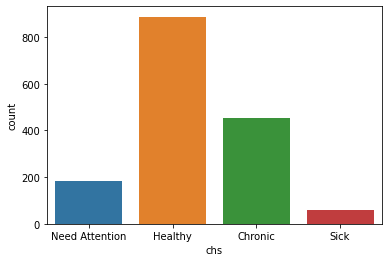

In [49]:
import seaborn as sns
sns.countplot(x=df_prob_alive["chs"])

In [50]:
df_prob_alive = df_prob_alive.reset_index()

In [51]:

df_prob_alive_csv = df_prob_alive[['opa_id', 'prob_adj', 'chs']].copy()
df_prob_alive_csv

,opa_id,prob_adj,chs
0,6776200069d0ff9fd275fa44387098bf61c6af465c5991816,0.67,Need Attention
1,67762003975f0d1d1b0b79d7eeb4df0ea0c8365dcc43c7598,0.89,Healthy
2,677620039ae224fbb5df2825e7f83a1891995856eec7b3244,0.92,Healthy
3,67762003a9770cbf53a2116ee3e7e9e22c3e54e50f1a47604,0.75,Need Attention
4,67762003e8a56d1281c11f3c388733e4d0789c5aae5f22044,0.93,Healthy
...,...,...,...
1579,67762feedde9d3458f01204e978e4a4ae06855293c8931942,0.73,Need Attention
1580,67762ff7eed44de857196f9390158ab1d7e83eaf701800952,0.95,Healthy
1581,67762ffae0df2a6b1760b8a6709964c7ee32a265c80142086,0.64,Need Attention
1582,67762ffb8ed6ea9d08a89946481234728bac91f263f433399,0.87,Healthy


In [52]:
df_prob_alive_csv.to_csv('chs_bas.csv', index = False)

In [53]:
df_prob_alive_csv_grouped = df_prob_alive_csv.groupby("chs")["opa_id"].count().reset_index(name="count")
df_prob_alive_csv_grouped['%'] = 100 * df_prob_alive_csv_grouped['count'] / df_prob_alive_csv_grouped['count'].sum()
df_prob_alive_csv_grouped

,chs,count,%
0,Chronic,454,28.66
1,Healthy,887,56.00
2,Need Attention,185,11.68
3,Sick,58,3.66


<AxesSubplot:xlabel='chs', ylabel='%'>

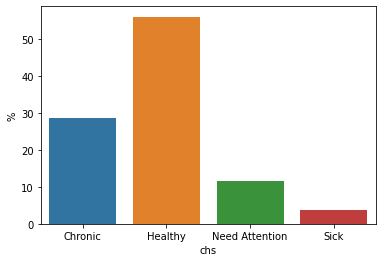

In [54]:
sns.barplot(data=df_prob_alive_csv_grouped, x="chs", y = '%')